<a href="https://colab.research.google.com/github/J0YA1/CodeClauseInternship_Object_Detection_System/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

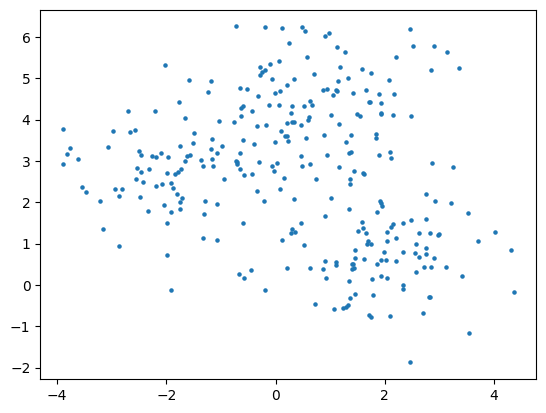

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

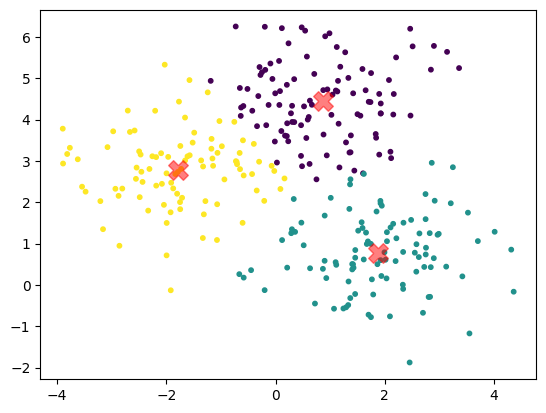

In [2]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, alpha=0.5)
plt.show()

In [3]:
from sklearn.metrics import silhouette_score

# Inertia (Sum of squared distances to centroids)
print("Intertia:", kmeans.inertia_) # lower = better

# Silhouette Score (-1 to 1; higher = better seperation)
silhouette_avg = silhouette_score(X, labels)
print("Silhouette score:", silhouette_avg)

Intertia: 536.4313417253243
Silhouette score: 0.4840958765959391


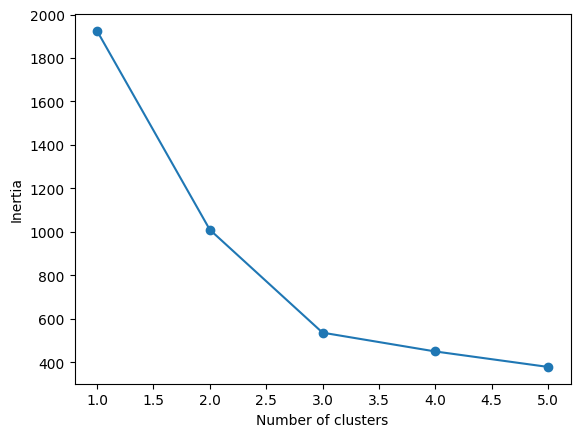

In [4]:
inertias = []

for  k in range(1,6):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,6), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
from sklearn.utils import shuffle
from matplotlib.image import imread

# Load image
image = imread('photo.jpg')
X_img = shuffle(image.reshape(-1, 3), random_state=42)[:1000]  # Sample pixels

# Cluster colors
kmeans = KMeans(n_clusters=16).fit(X_img)
compressed_colors = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_colors.reshape(image.shape)
plt.imshow(compressed_image.astype('uint8'))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'photo.jpg'

## K-Means from  scratch

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

In [ ]:
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        """
        Initialize the K-means parameters:

        - n_clusters: number of clusters
        - max_iter: maximum number of iterations
        - random_state: random state for reproducibility
        """

        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.intertia_ = None

    def initialize_centroids(self, X):
        "Randomly initialize centroid from data points"

        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[ random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        """Compute new centroids as mean of points in each clustre"""
        centroids = np.zeros((self.n_clusters, X.shape[1]))

        for k in range(self.n_clusters):
          centroids[k] = np.mean(X[labels == k], axis=0)

        return centroids

    def compute_distance(self, X, centroids):
        """Compute distance between points and centroids"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
          distances[:, k] = np.linalg.norm(X - centroids[k], axis=1)
        return distances